<a href="https://colab.research.google.com/github/cordmaur/38Cloud-Medium/blob/master/Copy_of_Python4Scientists_Lesson3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

from Lesson 2

In [1]:
# Suppose 3 students, with its ages:

lst = [('A', 11), ('B', 9), ('C', 10)]
lst

[('A', 11), ('B', 9), ('C', 10)]

# Introduction to Python for Scientists - Lesson 3

### Dictionaries
Similar to lists, but with a key to identify each item<br>
{key: value, key: value, key:value, ....}<br>
Keys are imutables <br>
<b>Note:</b> As of Python version 3.7, dictionaries are ordered. In Python 3.6 and earlier, dictionaries are unordered.






In [2]:
# if we received the structure proposed before, how could we get the age of student named C
# solution: go through the list, check the first item of the tuple, if it is C, get the second item of the tuple...
desired_student = 'C'

for student in lst:
    if student[0] == desired_student:   
        print(f'Student {desired_student} has {student[1]} years old')

Student C has 10 years old


In [3]:
# if data had been passed by 2 lists... we needed to use the common index to locate the age
names = ['A', 'B', 'C']
ages = [11, 9, 10]

desired_student == 'C'

idx = names.index(desired_student)
print(ages[idx])

10


In [4]:
# using dictionaries
students = {'A': 11, 'B': 9, 'C': 10}
students

{'A': 11, 'B': 9, 'C': 10}

In [5]:
students['C']

10

In [6]:
# nothing prevent us to create inner dictionaries:
students = {'A': {'age': 11, 'Height': 145},
            'B': {'age': 9, 'Height': 144.2},
            'C': {'age': 10, 'Height': 147},
            }

desired_student = 'C'
students[desired_student]

{'Height': 147, 'age': 10}

In [7]:
students[desired_student]['age']

10

In [8]:
desired_student = 'B'
print(f"Student {desired_student} has {students[desired_student]['age']} and measures {students[desired_student]['Height']}")

Student B has 9 and measures 144.2


In [49]:
# updating the Dictionary
students['A']['age'] = 12
students

{'A': {'Height': 145, 'age': 12},
 'B': {'Height': 144.2, 'age': 9},
 'C': {'Height': 147, 'age': 10}}

In [51]:
students.update({'D': {'Height': 146, 'age': 11}})
students

{'A': {'Height': 145, 'age': 12},
 'B': {'Height': 144.2, 'age': 9},
 'C': {'Height': 147, 'age': 10},
 'D': {'Height': 146, 'age': 11}}

In [54]:
students['E'] = ['no information']
students

{'A': {'Height': 145, 'age': 12},
 'B': {'Height': 144.2, 'age': 9},
 'C': {'Height': 147, 'age': 10},
 'D': {'Height': 146, 'age': 11},
 'E': ['no information']}

Back to our hydrological example

In [11]:
# from Lesson 2

import random
# create the days and daily rain
random.seed(1)

daily_rain = []
day_of_month = []

for i in range(1, 32, 1):
    day_of_month.append(i)
    daily_rain.append(random.randint(0, 100))

str(day_of_month), str(daily_rain)

('[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]',
 '[17, 72, 97, 8, 32, 15, 63, 97, 57, 60, 83, 48, 100, 26, 12, 62, 3, 49, 55, 77, 97, 98, 0, 89, 57, 34, 92, 29, 75, 13, 40]')

In [15]:
# what happened on day X 
day = 15
idx = day_of_month.index(day)
print(f'Index for day {day} is idx:{idx}' )
daily_rain[idx]

Index for day 15 is idx:14


12

In [17]:
rain_dict = {}
for idx, day in enumerate(day_of_month):
    rain_dict[day] = daily_rain[idx]
    #rain_dict.update({day: daily_rain[idx]})

rain_dict

{1: 17,
 2: 72,
 3: 97,
 4: 8,
 5: 32,
 6: 15,
 7: 63,
 8: 97,
 9: 57,
 10: 60,
 11: 83,
 12: 48,
 13: 100,
 14: 26,
 15: 12,
 16: 62,
 17: 3,
 18: 49,
 19: 55,
 20: 77,
 21: 97,
 22: 98,
 23: 0,
 24: 89,
 25: 57,
 26: 34,
 27: 92,
 28: 29,
 29: 75,
 30: 13,
 31: 40}

In [ ]:
rain_dict[29]

75

What if I wanted to create a complete time series?

Let's test it with another data (river stage = river level)

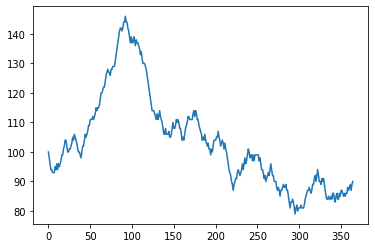

In [20]:
# Now I will create a random walk (non-stationary) to represent river stage
import matplotlib.pyplot as plt

random.seed(2)

river_stage = [100]

for _ in range(364):
    river_stage.append(river_stage[-1] + random.randint(-2, 2))    

plt.plot(river_stage)

what happened on 1st of July? We could count, but it depends on the number of days that happen in february... :(


We could create a dictionary with sequential keys (1, 2, 3...) but that would not be helpful either... 

## Datetime Basics

**datetime** class represents a static date/time <br>
**timedelta** represents a period measured in days or months or minutes, etc


In [22]:
from datetime import datetime, timedelta

In [26]:
datetime.now()

datetime.datetime(2021, 12, 7, 16, 28, 16, 671077)

In [27]:
datetime?

In [28]:
dt1 = datetime(2021, 1, 1)
dt1

datetime.datetime(2021, 1, 1, 0, 0)

In [31]:
dt2 = dt1 + timedelta(days=1)
dt2

datetime.datetime(2021, 1, 2, 0, 0)

In [32]:
dt2 - dt1

datetime.timedelta(days=1)

In [35]:
dt2.day, dt2.month, dt2.year, dt2.hour, dt2.minute, dt2.second

(2, 1, 2021, 0, 0, 0)

Now we have the river stage in a list and we know how to create dates. How can we create a dictionary to store stages into the correct dates?

## Dictionary comprehension

In [42]:
first_day = datetime(2020, 1, 1)

stages = {first_day + timedelta(days=i): stage for i, stage in enumerate(river_stage)}

stages

{datetime.datetime(2020, 1, 1, 0, 0): 100,
 datetime.datetime(2020, 1, 2, 0, 0): 98,
 datetime.datetime(2020, 1, 3, 0, 0): 96,
 datetime.datetime(2020, 1, 4, 0, 0): 94,
 datetime.datetime(2020, 1, 5, 0, 0): 94,
 datetime.datetime(2020, 1, 6, 0, 0): 93,
 datetime.datetime(2020, 1, 7, 0, 0): 93,
 datetime.datetime(2020, 1, 8, 0, 0): 93,
 datetime.datetime(2020, 1, 9, 0, 0): 95,
 datetime.datetime(2020, 1, 10, 0, 0): 94,
 datetime.datetime(2020, 1, 11, 0, 0): 96,
 datetime.datetime(2020, 1, 12, 0, 0): 94,
 datetime.datetime(2020, 1, 13, 0, 0): 96,
 datetime.datetime(2020, 1, 14, 0, 0): 95,
 datetime.datetime(2020, 1, 15, 0, 0): 96,
 datetime.datetime(2020, 1, 16, 0, 0): 97,
 datetime.datetime(2020, 1, 17, 0, 0): 99,
 datetime.datetime(2020, 1, 18, 0, 0): 99,
 datetime.datetime(2020, 1, 19, 0, 0): 101,
 datetime.datetime(2020, 1, 20, 0, 0): 102,
 datetime.datetime(2020, 1, 21, 0, 0): 104,
 datetime.datetime(2020, 1, 22, 0, 0): 104,
 datetime.datetime(2020, 1, 23, 0, 0): 102,
 datetime.date

In [44]:
desired_day = datetime(2020, 1, 7)

stages[desired_day]

93

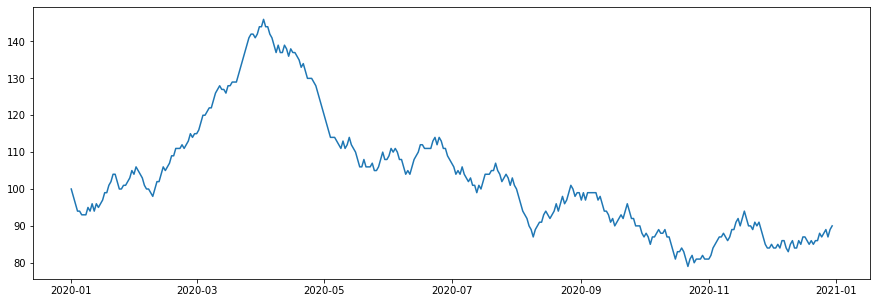

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(list(stages.keys()), list(stages.values()))

## Example

What if we want to store the river stages for 3 different stations? Are dictionaries a viable solution?


In [46]:
# create 3 stations
stations = [f'Station {i}' for i in range(1, 4)]
stations

['Station 1', 'Station 2', 'Station 3']

In [47]:
random.seed(4)

stage_data = {}
first_day = datetime(2020, 1, 1)

for station in stations:

    print(f'Creating stage data for station {station}')

    # create a random series
    stages_list = [random.randint(50, 150)]
    for _ in range(364):
        stages_list.append(stages_list[-1] + random.randint(-2, 2))

    # create the stages dictionary with the dates and assign it to a specific station
    stage_data[station] = {first_day + timedelta(days=i): stage for i, stage in enumerate(stages_list)}



Creating stage data for station Station 1
Creating stage data for station Station 2
Creating stage data for station Station 3


In [ ]:
str(stage_data)

"{'Station 1': {datetime.datetime(2020, 1, 1, 0, 0): 80, datetime.datetime(2020, 1, 2, 0, 0): 80, datetime.datetime(2020, 1, 3, 0, 0): 78, datetime.datetime(2020, 1, 4, 0, 0): 79, datetime.datetime(2020, 1, 5, 0, 0): 80, datetime.datetime(2020, 1, 6, 0, 0): 79, datetime.datetime(2020, 1, 7, 0, 0): 77, datetime.datetime(2020, 1, 8, 0, 0): 75, datetime.datetime(2020, 1, 9, 0, 0): 73, datetime.datetime(2020, 1, 10, 0, 0): 74, datetime.datetime(2020, 1, 11, 0, 0): 76, datetime.datetime(2020, 1, 12, 0, 0): 76, datetime.datetime(2020, 1, 13, 0, 0): 74, datetime.datetime(2020, 1, 14, 0, 0): 73, datetime.datetime(2020, 1, 15, 0, 0): 75, datetime.datetime(2020, 1, 16, 0, 0): 77, datetime.datetime(2020, 1, 17, 0, 0): 77, datetime.datetime(2020, 1, 18, 0, 0): 77, datetime.datetime(2020, 1, 19, 0, 0): 76, datetime.datetime(2020, 1, 20, 0, 0): 74, datetime.datetime(2020, 1, 21, 0, 0): 74, datetime.datetime(2020, 1, 22, 0, 0): 73, datetime.datetime(2020, 1, 23, 0, 0): 71, datetime.datetime(2020, 1, 

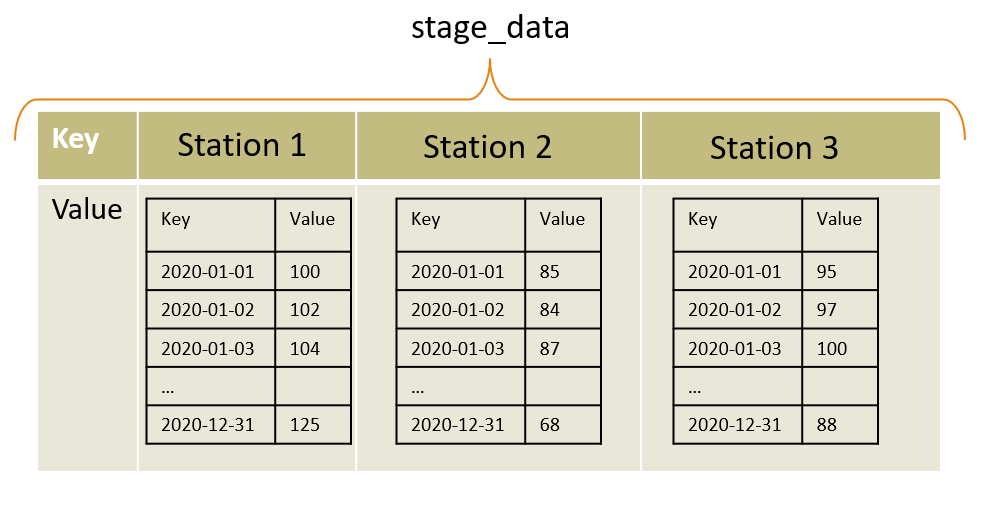

In [ ]:
stage_data['Station 1'][datetime(2020, 8, 30)]

58

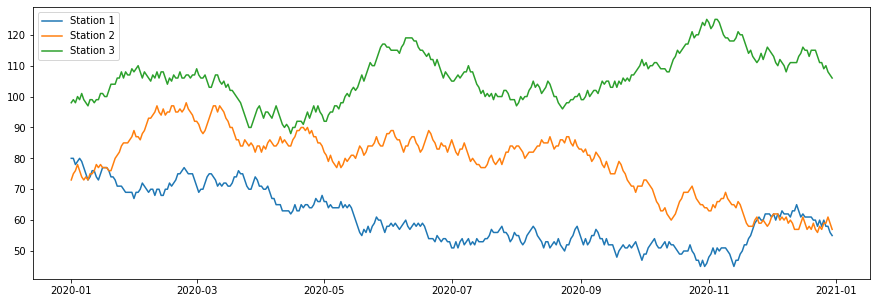

In [ ]:
plt.figure(figsize=(15, 5))

for station in stations:
    plt.plot(list(stage_data[station].keys()), list(stage_data[station].values()), label=station)

plt.legend()

Does it seem ackward? Dictionary inside another dictionary?

In [ ]:
# the indices are perfectly aligned
import pandas as pd
df = pd.DataFrame(stage_data)

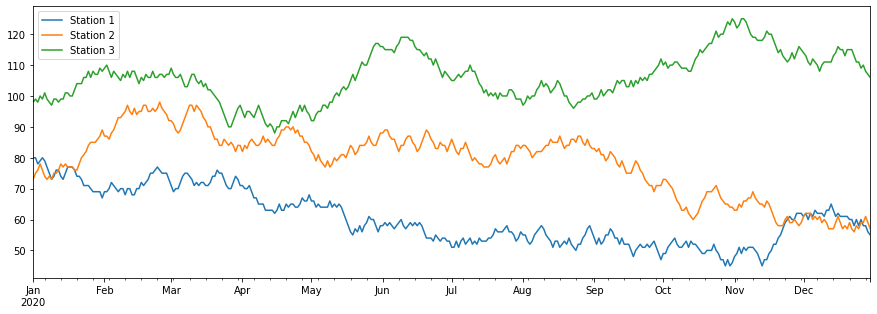

In [ ]:
df.plot(figsize=(15, 5))

## Exercise

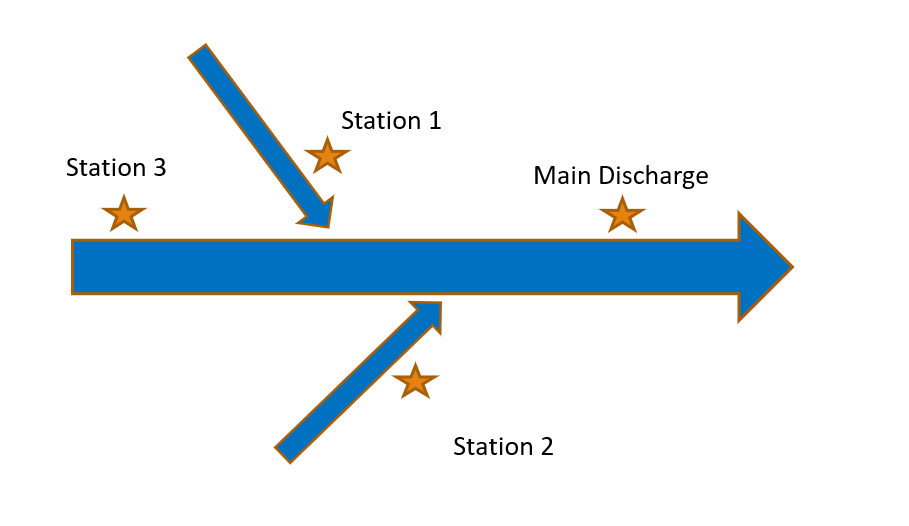

* The daily discharge on the main river?
* The mean discharge on the main river?
* The monthly mean discharge on the main river?
* The days of maximum and minimum discharge?

Using the pandas dataframe or not???

## Functions

A function is a block of code which only runs when it is called.

You can pass data, known as parameters, into a function.

A function can return data as a result.

In [ ]:
def square(x):
    return x**2

square(11)

In [ ]:
def power(base, expoent):
    return base**expoent

power(2, 8)

In [ ]:
# base and expoent are required arguments
# power(2)

In [ ]:
power(expoent=8, base=2)

In [ ]:
# b is an optional (default) parameter
# def y = a*x + b
def linear(x, a, b=0):
    y = a * x + b
    return y

linear(2, 3)

In [ ]:
# nomenclature 2 is a positional argument
# -10 and 3 are keyword arguments
linear(2, b=-10, a=3)

In [ ]:
# y = a*x^2 + b*x + c
def quadratic(x, a, b=1, c=0):
    y = a * power(x, 2) + b*x + c
    return y

In [ ]:
quadratic(a=1, x=2)

Explain the scope. Variables have specific scope inside the function...

In [ ]:
import math

In [ ]:
dir(math)

## The value <b>None</b>


The value **None** is used to define a null value. **It is not the same as an empty string, False, or a zero.** It is a data type of the class NoneType object.

In [ ]:
None == "", None == False, None == 0

In [ ]:
# correct way of testing (is -> identity operator)
x = 0
x is None, x is not None

In [ ]:
bool(None), bool(0), bool(False), bool(123)

In [ ]:
# None is absence of value, so we cannot implement this...
def check_value(x):
    if x:
        print(f'{x} has a value')
    else:
        print(f'{x} has no value at all')

In [ ]:
check_value(None), check_value(0), check_value(False)

In [ ]:
# Why is that... that's because if x: is testing the BOOLEAN result of x.
# To test it correctly we should do:

def check_value(x):
    if  x is None:
        print(f'{x} has no value at all')
    else:
        print(f'{x} has a value')


In [ ]:
check_value(None), check_value(0), check_value(False)